<a href="https://colab.research.google.com/github/baldeoJV/pawScan_model/blob/main/DogBreedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    GlobalAveragePooling2D,
    Conv2D,
    MaxPool2D,
    RandomHeight,
    RandomWidth,
    RandomZoom,
    RandomRotation,
    RandomFlip,
)
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
print("Num GPUs Available:", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available: 1


# Creating a dataset class object for the data


In [1]:
import os
DIR = "./dataset/images/Images"
class_names = sorted(os.listdir(DIR))
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [ ]:

BATCH_SIZE = 16
IMG_SHAPE = (128, 128)
train_data, test_data = image_dataset_from_directory(
    DIR,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    label_mode="categorical",
    validation_split=0.2,
    subset="both",
    seed=42,
)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Using 4116 files for validation.


In [25]:
class_names = train_data.class_names
class_names

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [26]:
def display_random_image(train_data, class_names):
    for images, labels in train_data.take(1):
        # Select the first image from the batch
        image = images[0].numpy()
        print(class_names[tf.argmax(labels[0])])
        # Display the image using Matplotlib
        plt.imshow(image.astype("uint8"))  # Assuming the image is in uint8 format
        plt.title(f"Class: {labels[0].numpy()}")
        plt.show()

n02091831-Saluki


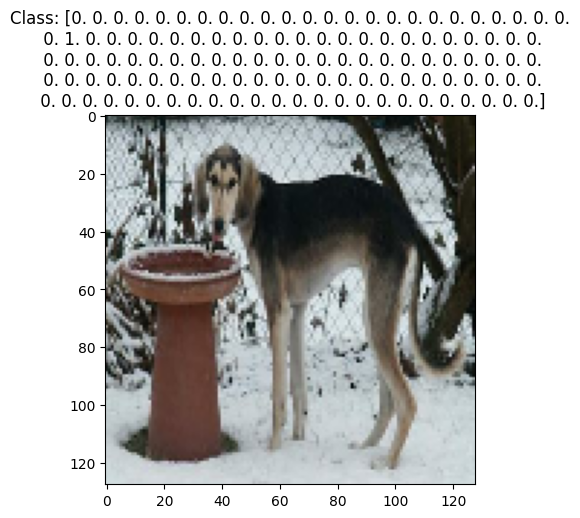

2025-05-18 15:41:57.999005: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [27]:
display_random_image(train_data, class_names)

# Creating the baseline model


In [28]:
inputs = tf.keras.layers.Input(shape=IMG_SHAPE + (3,))
x = Conv2D(256, 5, activation="relu")(inputs)
x = Conv2D(256, 5, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(128, 5, activation="relu")(x)
x = Conv2D(128, 5, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(64, 5, activation="relu")(x)
x = Conv2D(64, 5, activation="relu")(x)
x = MaxPool2D()(x)
x = Flatten()(x)
outputs = Dense(120, activation="softmax")(x)

model1 = Model(inputs, outputs)

In [29]:
model1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"],
)

In [30]:
model1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 124, 124, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 120, 120, 256)  │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 52, 52, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 22, 22, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       622,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,816,696 (14.56 MB)

 Trainable params: 3,816,696 (14.56 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history1 = model1.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    validation_steps=int(0.5 * len(test_data)),
)

Epoch 1/5
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.0100 - loss: 159252.8281

2025-05-18 15:47:24.427131: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.18 = (f32[16,256,124,124]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,128,128]{3,2,1,0} %bitcast.588, f32[256,3,5,5]{3,2,1,0} %bitcast.595, f32[256]{0} %bitcast.597), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_2_1/conv2d_12_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 15:47:24.548709: I external/local_xla/xla/service/gpu/autotuning/conv_algorith

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 357s 343ms/step - accuracy: 0.0100 - loss: 159122.0000 - val_accuracy: 0.0107 - val_loss: 4.7933
Epoch 2/5
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 340s 331ms/step - accuracy: 0.0112 - loss: 4.7889 - val_accuracy: 0.0150 - val_loss: 4.7944
Epoch 3/5
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 340s 331ms/step - accuracy: 0.0106 - loss: 4.7886 - val_accuracy: 0.0107 - val_loss: 4.7937
Epoch 4/5
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 341s 331ms/step - accuracy: 0.0100 - loss: 4.7892 - val_accuracy: 0.0107 - val_loss: 4.7944
Epoch 5/5
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 341s 332ms/step - accuracy: 0.0108 - loss: 4.7890 - val_accuracy: 0.0107 - val_loss: 4.7947


In [33]:
def plot_history_graph(history_feature_extraction):
    accuracy = history_feature_extraction.history["accuracy"]
    val_accuracy = history_feature_extraction.history["val_accuracy"]

    loss = history_feature_extraction.history["loss"]
    val_loss = history_feature_extraction.history["val_loss"]

    epoch = history_feature_extraction.epoch

    figure = plt.figure(figsize=(10, 5))
    plt.plot(epoch, accuracy, label="training accuracy")
    plt.plot(epoch, val_accuracy, label="testing accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("accuracy graph")
    plt.legend()

    figure2 = plt.figure(figsize=(10, 5))
    plt.plot(epoch, loss, label="training loss")
    plt.plot(epoch, val_loss, label="testing  loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("loss curve")
    plt.legend()

    plt.show()

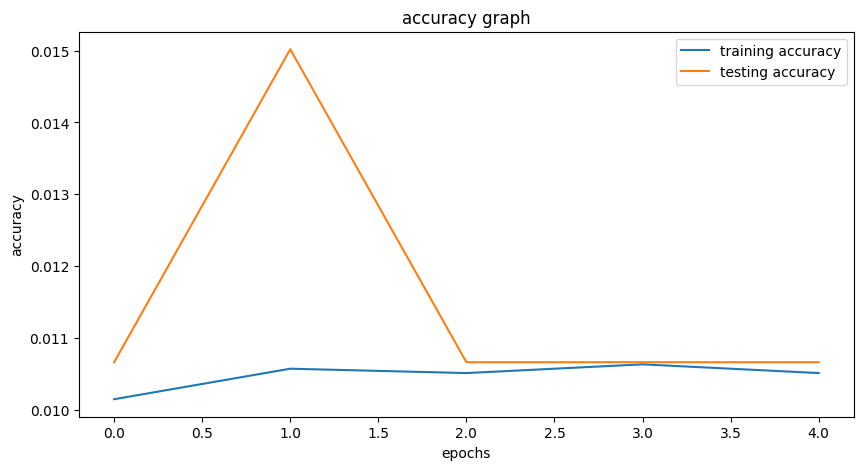

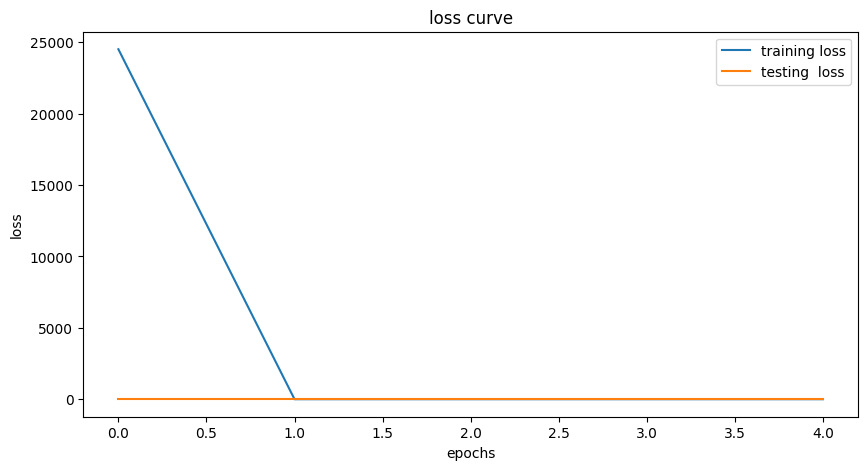

In [34]:
plot_history_graph(history1)

-   The loss isn't going down and the accuracy is not improving either, we'll create a new model with data aug and scaling


# Model 2 - Reduce Conv kernel size, introduce data augmentation and global average pooling


**Note** : For some reason the gpu was taking too long to augment the data so we are going to use the image data generator to augment our data


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE2 = 8
datagen = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)
train_data_aug = datagen.flow_from_directory(
    DIR,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE2,
    class_mode="categorical",
    subset="training",
)
test_data_aug = datagen.flow_from_directory(
    DIR,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE2,
    class_mode="categorical",
    subset="validation",
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [42]:
inputs = tf.keras.layers.Input(shape=IMG_SHAPE + (3,))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = Conv2D(256, 3, activation="relu")(x)
x = Conv2D(256, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, activation="relu")(x)
x = Conv2D(128, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(120, activation="softmax")(x)

model2 = Model(inputs, outputs)

In [43]:
model2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [44]:
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 124, 124, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 58, 58, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 27, 27, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │         7,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158,392 (4.42 MB)

 Trainable params: 1,158,392 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history2 = model2.fit(
    train_data_aug,
    epochs=5,
    validation_data=test_data_aug,
    validation_steps=int(0.5 * len(test_data_aug)),
)

Epoch 1/5


/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-05-18 16:17:01.039303: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.18 = (f32[8,256,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,128,128]{3,2,1,0} %bitcast.3302, f32[256,3,3,3]{3,2,1,0} %bitcast.3072, f32[256]{0} %bitcast.3682), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_24_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Proje

 206/2064 ━━━━━━━━━━━━━━━━━━━━ 4:38 150ms/step - accuracy: 0.0078 - loss: 4.7928

2025-05-18 16:17:45.215318: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.18 = (f32[4,256,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,128,128]{3,2,1,0} %bitcast.3302, f32[256,3,3,3]{3,2,1,0} %bitcast.3072, f32[256]{0} %bitcast.3682), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_24_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 16:17:46.292370: I external/local_xla/xla/service/gpu/autotuning/conv_algorit

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0091 - loss: 4.7875

2025-05-18 16:22:32.296839: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.18 = (f32[8,256,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,128,128]{3,2,1,0} %bitcast.603, f32[256,3,3,3]{3,2,1,0} %bitcast.610, f32[256]{0} %bitcast.612), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_4_1/conv2d_24_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 16:22:32.379271: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 350s 163ms/step - accuracy: 0.0091 - loss: 4.7875 - val_accuracy: 0.0128 - val_loss: 4.7818
Epoch 2/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 323s 156ms/step - accuracy: 0.0135 - loss: 4.7818 - val_accuracy: 0.0103 - val_loss: 4.7797
Epoch 3/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 323s 156ms/step - accuracy: 0.0108 - loss: 4.7814 - val_accuracy: 0.0108 - val_loss: 4.7837
Epoch 4/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 323s 157ms/step - accuracy: 0.0116 - loss: 4.7815 - val_accuracy: 0.0108 - val_loss: 4.7794
Epoch 5/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 324s 157ms/step - accuracy: 0.0116 - loss: 4.7810 - val_accuracy: 0.0133 - val_loss: 4.7766


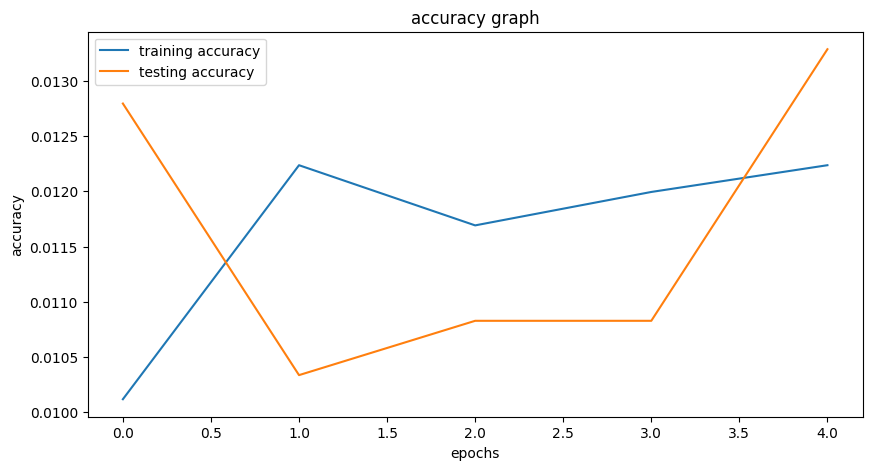

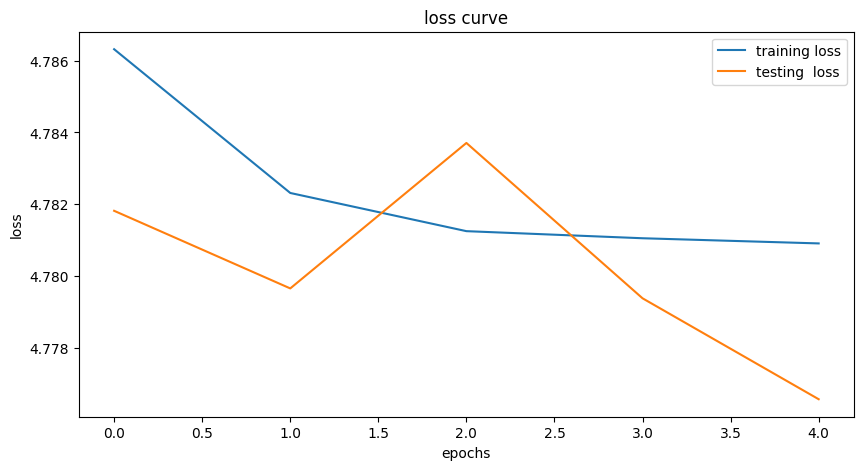

In [46]:
plot_history_graph(history2)

-   Model 2 is not performing any better, next try increase the number of layers and decrease per layer convolutions


# Model3 - Increase number of convolution layers, decrease pooling layers


In [47]:
inputs = tf.keras.layers.Input(shape=IMG_SHAPE + (3,))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = Conv2D(64, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = Conv2D(64, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(16, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(120, activation="softmax")(x)

model3 = Model(inputs, outputs)

In [48]:
model3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)
model3.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 120, 120, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 58, 58, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 54, 54, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 22, 22, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 20, 20, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 18, 18, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │       622,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 792,568 (3.02 MB)

 Trainable params: 792,568 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history3 = model3.fit(
    train_data_aug,
    epochs=5,
    validation_data=test_data_aug,
    validation_steps=int(0.5 * len(test_data_aug)),
)

Epoch 1/5


2025-05-18 16:44:50.317353: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.36 = (f32[8,64,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,128,128]{3,2,1,0} %bitcast.5152, f32[64,3,3,3]{3,2,1,0} %bitcast.4819, f32[64]{0} %bitcast.5609), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_5_1/conv2d_30_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 16:44:50.404055: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

1000/2064 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.0112 - loss: 4.7884

2025-05-18 16:45:40.104305: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.36 = (f32[4,64,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,128,128]{3,2,1,0} %bitcast.5152, f32[64,3,3,3]{3,2,1,0} %bitcast.4819, f32[64]{0} %bitcast.5609), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_5_1/conv2d_30_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 16:45:40.274933: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0110 - loss: 4.7875

2025-05-18 16:46:30.795027: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.36 = (f32[8,64,126,126]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,128,128]{3,2,1,0} %bitcast.757, f32[64,3,3,3]{3,2,1,0} %bitcast.764, f32[64]{0} %bitcast.766), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_5_1/conv2d_30_1/convolution" source_file="/home/ubuntu-rainn/Downloads/Projects/Dogs/venv_tf_gpu1/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-18 16:46:30.863926: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_pic

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 115s 50ms/step - accuracy: 0.0110 - loss: 4.7875 - val_accuracy: 0.0108 - val_loss: 4.7816
Epoch 2/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 94s 45ms/step - accuracy: 0.0108 - loss: 4.7825 - val_accuracy: 0.0128 - val_loss: 4.7807
Epoch 3/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 95s 46ms/step - accuracy: 0.0121 - loss: 4.7801 - val_accuracy: 0.0143 - val_loss: 4.7782
Epoch 4/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 94s 46ms/step - accuracy: 0.0120 - loss: 4.7808 - val_accuracy: 0.0103 - val_loss: 4.7806
Epoch 5/5
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 94s 46ms/step - accuracy: 0.0112 - loss: 4.7796 - val_accuracy: 0.0138 - val_loss: 4.7780


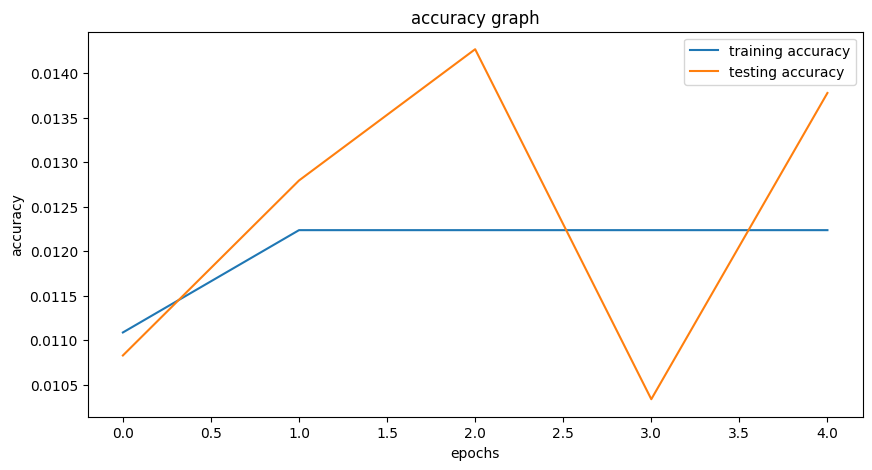

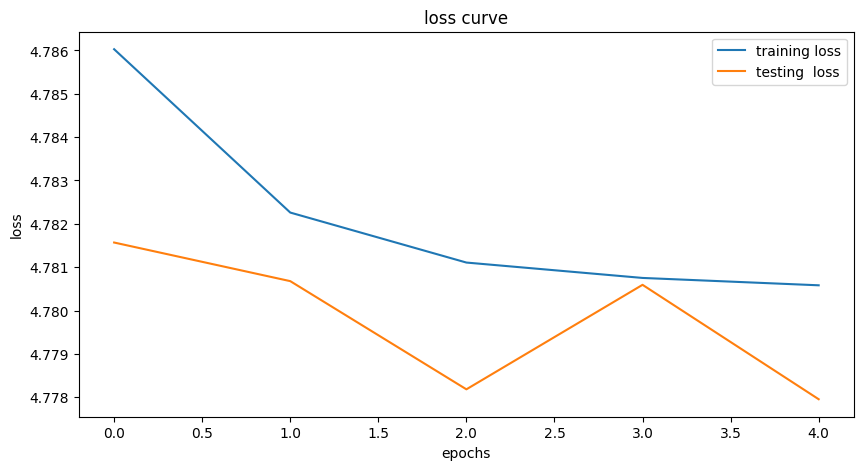

In [50]:
plot_history_graph(history3)

-   The model still isn't performing any good, lets try and use transfer learning to drastically increase the accuracy of our model


# Transfer Learning


In [51]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SHAPE + (3,), name="InputLayer")

# Base Model Layer
x = base_model(inputs, training=False)

# GAP2D Layer
x = GlobalAveragePooling2D(name="GAP2DLayer")(x)

# Output Layer
outputs = Dense(120, activation="softmax", name="OutputLayer")(x)

# Model creation
model = Model(inputs, outputs)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [52]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GAP2DLayer                      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [53]:
initial_epochs = 3

history_feature_extraction = model.fit(
    train_data_aug, epochs=initial_epochs, validation_data=test_data_aug
)

Epoch 1/3
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 132s 52ms/step - accuracy: 0.4547 - loss: 2.3794 - val_accuracy: 0.6373 - val_loss: 1.2977
Epoch 2/3
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 93s 45ms/step - accuracy: 0.6576 - loss: 1.1692 - val_accuracy: 0.6449 - val_loss: 1.2907
Epoch 3/3
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 95s 46ms/step - accuracy: 0.6966 - loss: 1.0271 - val_accuracy: 0.6397 - val_loss: 1.3254


In [54]:
model.evaluate(test_data_aug)

509/509 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.6392 - loss: 1.3207


[1.336706280708313, 0.6380156874656677]

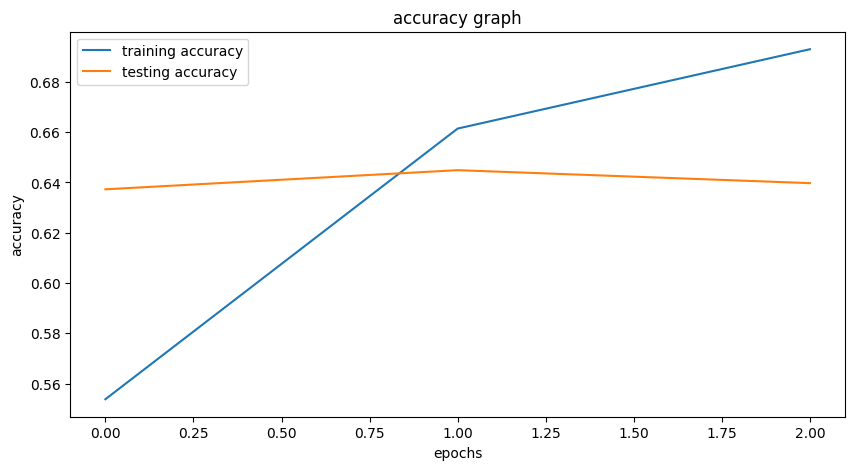

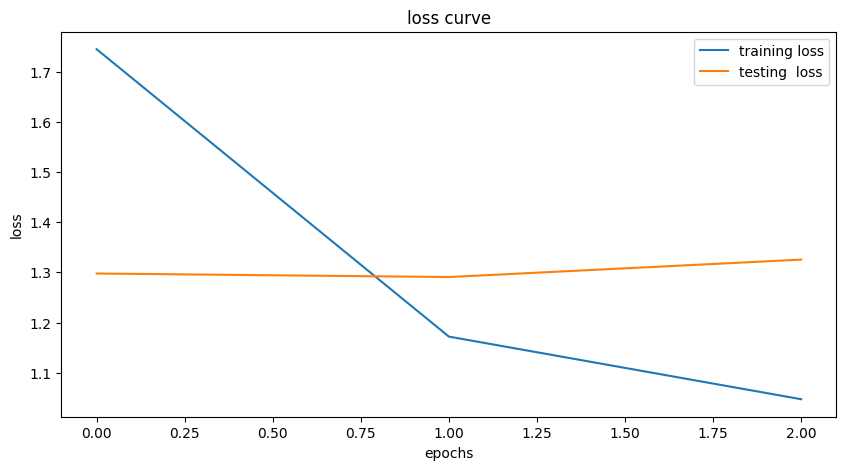

In [55]:
plot_history_graph(history_feature_extraction)

# Trying to fine tune and see if we can squeeze a bit more accuracy


In [56]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

for x in base_model.layers:
    if x.trainable == True:
        print(x.name, x.trainable)
print("total layers -", len(base_model.layers))

block6h_se_reduce True
block6h_se_expand True
block6h_se_excite True
block6h_project_conv True
block6h_project_bn True
block6h_drop True
block6h_add True
top_conv True
top_bn True
top_activation True
total layers - 270


In [58]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(
        0.0005
    ),  # reducing learning rate to not overfit on current dataset
    metrics=["accuracy"],
)
fine_tuning_epochs = initial_epochs + 5

history_fine_tuning = model.fit(
    train_data_aug,
    epochs=fine_tuning_epochs,
    initial_epoch=initial_epochs,
    validation_data=test_data_aug,
    validation_steps=int(0.5 * len(test_data_aug)),
)

Epoch 4/8
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 117s 46ms/step - accuracy: 0.6996 - loss: 1.0170 - val_accuracy: 0.6560 - val_loss: 1.2478
Epoch 5/8
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.7313 - loss: 0.9057 - val_accuracy: 0.6481 - val_loss: 1.3507
Epoch 6/8
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7548 - loss: 0.8161 - val_accuracy: 0.6526 - val_loss: 1.3413
Epoch 7/8
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7697 - loss: 0.7617 - val_accuracy: 0.6398 - val_loss: 1.4327
Epoch 8/8
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7828 - loss: 0.7168 - val_accuracy: 0.6516 - val_loss: 1.3543


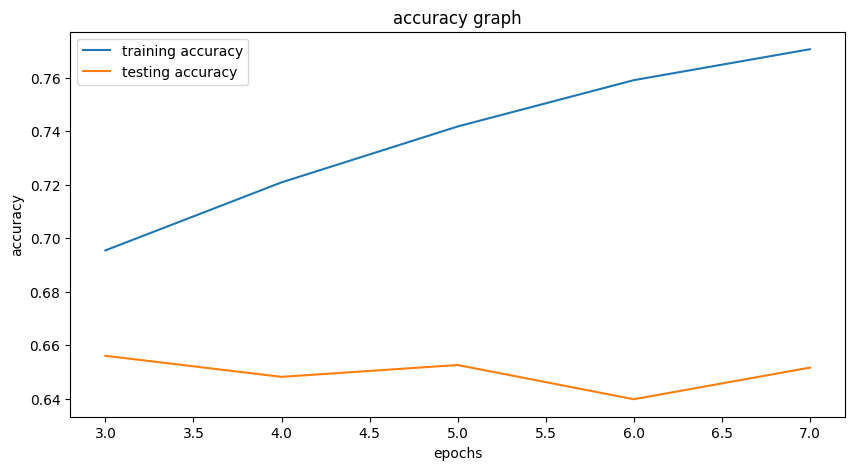

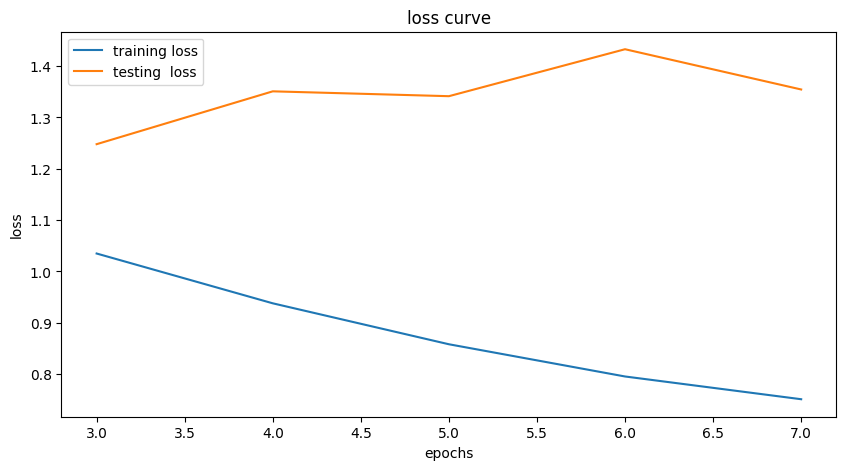

In [59]:
plot_history_graph(history_fine_tuning)

In [60]:
# final accuracy

model.evaluate(test_data_aug)

509/509 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.6524 - loss: 1.3508


[1.3745964765548706, 0.64833003282547]

In [63]:
model.save("./models/model_experimental_v1_keras.h5")

In [65]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("./models/model_experimental_v1.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp6gr3qe12/assets


INFO:tensorflow:Assets written to: /tmp/tmp6gr3qe12/assets


Saved artifact at '/tmp/tmp6gr3qe12'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='InputLayer')
Output Type:
  TensorSpec(shape=(None, 120), dtype=tf.float32, name=None)
Captures:
  136994595993936: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136996061777360: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136996061778320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996061782160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996059667856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136995773266832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996061776592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996059667088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996059666512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136996059667280: TensorSpec(shape=(), dtype=tf.resource, name=None

W0000 00:00:1747559629.887142   39506 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747559629.887166   39506 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-18 17:13:49.887411: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp6gr3qe12
2025-05-18 17:13:49.911180: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-18 17:13:49.911206: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp6gr3qe12
2025-05-18 17:13:50.129554: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-18 17:13:51.188529: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp6gr3qe12
2025-05-18 17:13:51.464313: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 1576904 microseconds.
